<a href="https://colab.research.google.com/github/mbangash1neiu/Google-Colab/blob/main/Urbana%20Champaign%20Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Analyzing, Cleaning, Visualization by Muhammad Bangash 

---


### LinkedIn https://www.linkedin.com/in/muhammad-saad-bangash-897a5216b/

References for map visualization: 
*   https://bit.ly/3iajGjI 
*   https://bit.ly/3i6xb40

In [1]:
# install libraries by !pip install "libraryname"
!pip install matplotlib

In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
from matplotlib.pyplot import *
import folium as fo
from tqdm.notebook import tqdm
import fileinput

In [3]:
# reading a dataset.csv into a pandas dataframe
df_dataset = pd.read_csv('UC.csv')
df_dataset.head()

,user_id,bus_id,rating,date,lat,lon
0,PVyZXgOkVtnU6966FDFhuw,9MnbQg7kfb_WgxoV0hXKSQ,5,2/9/2013,40.113818,-88.207689
1,l6weiXVbIeHP0y2brjzikg,8mKV3KThn3wXGL3OVxrCNg,2,11/24/2016,40.111959,-88.208652
2,TTLfM41v6O5nleh-qd7GKQ,yUB8CDsYMES3cN-xcHXCkQ,2,6/20/2015,40.112398,-88.209260
3,pgFHVR9W_FHCMoPc8fe9xw,gZI007iLBe_LZbrHSDxHtg,2,7/19/2009,40.111105,-88.207227
4,gWAnm_nfLJ3taYm53cMOSw,vCopginiBsz1STNhQPb8XA,5,1/4/2016,40.112757,-88.208503


In [4]:
# finding dataset columns
df_dataset.columns

Index(['user_id', 'bus_id', 'rating', 'date', 'lat', 'lon'], dtype='object')

In [5]:
# counting rating column and sorting it by index
df_dataset['rating'].value_counts().sort_index()

1     5068
2     3397
3     4476
4     8179
5    12832
Name: rating, dtype: int64

In [6]:
# finding number of unique users
print(len(df_dataset['user_id'].unique()))

11781


In [7]:
# finding number of unique businesses
print(len(df_dataset['bus_id'].unique()))

1557


In [8]:
# finding number of all users
print(len(df_dataset['user_id']))

33952


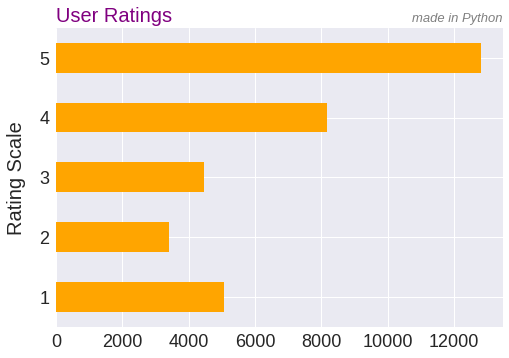

In [9]:
# plotting a horizontal bar graph of all users ratings
plot = df_dataset['rating'].value_counts().sort_index().plot.barh(color='orange', fontsize=18)
plot.set_title("User Ratings", fontsize=20, fontweight=0, color='purple', loc='left')
plot.set_title("made in Python", loc='right', fontsize=13, color='grey', style='italic')
plot.set_ylabel("Rating Scale", fontsize=20, labelpad=13)
# plot.set_xlabel("# of Ratings", fontsize=20, labelpad=13) 
# plot.bar_label(plot.containers[0], label_type='edge',fontsize=16) # for showing the data values of each bar
plot.figure.savefig("PrivacyRS_dataset_hbar.png", bbox_inches='tight', dpi=600)

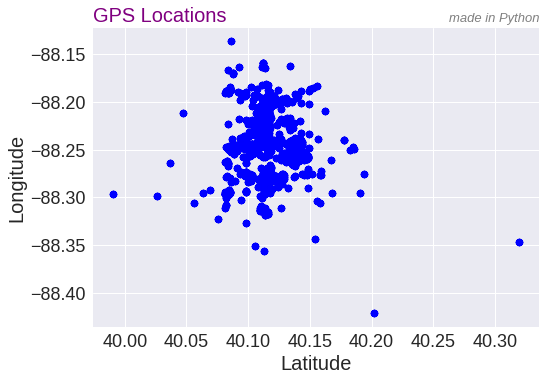

In [10]:
# latitude and longitude scatter plot
# data cleaning for runtime effeciency. I will drop lat,lng duplicates.
df_lat_lon_unique = df_dataset.drop_duplicates(subset = ["lat", "lon"]) # drop subset lat,lng duplicates
df_lat_lon_unique = df_lat_lon_unique[(df_lat_lon_unique['lat'] != 0) & (df_lat_lon_unique['lon'] != 0)] # ignore 0s
for method in df_lat_lon_unique:
    x = df_lat_lon_unique['lat']
    y = df_lat_lon_unique['lon']
    plt.scatter(x,y,color='blue',marker='o')
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Longitude", fontsize=20) 
plt.tick_params(labelsize=18) #for changing x, y values fontsize
plt.title("GPS Locations", fontsize=20, fontweight=0, color='purple', loc='left')
plt.title("made in Python", loc='right', fontsize=13, color='grey', style='italic')
plt.savefig("PrivacyRS_dataset.png", bbox_inches='tight', dpi=600)
plt.show() 

In [11]:
# interact with this map in aws s3, check it out! https://bit.ly/3ugfRhD
# use folium to create a map
map_lat_lon = fo.Map(location=[df_lat_lon_unique["lat"].mean(), df_lat_lon_unique["lon"].mean()], tiles='Stamen Toner')
for i,j in tqdm(df_lat_lon_unique.iterrows()):
    fo.Marker(list((j['lat'],j['lon']))).add_to(map_lat_lon)

# save map as html
mapFname = 'output.html'
map_lat_lon.save(mapFname)

# # Turn ZoomControl off in html file
# with fileinput.FileInput('output' + '.html', inplace=True) as file:
#         for line in file:
#             print(line.replace('zoomControl: true', 'zoomControl: false'), end='')
map_lat_lon

0it [00:00, ?it/s]